<a href="https://colab.research.google.com/github/viniciusgomesbatista/MaterialsSience/blob/main/Concrete_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Estudos/Pós Graduação/concrete_data.csv')

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
train, test = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [ ]:
reg = setup(data = train,           # Banco de dados
              target = 'Strength',   # Desfecho que estamos tentando prever
              train_size = 0.7)     # Proporção do banco de treino

,Description,Value
0,Session id,5869
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(824, 9)"
4,Transformed data shape,"(824, 9)"
5,Transformed train set shape,"(576, 9)"
6,Transformed test set shape,"(248, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Treinar modelos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.6745,29.0737,5.2930,0.9019,0.1644,0.1250,0.1720
et,Extra Trees Regressor,3.5477,30.7255,5.4688,0.8951,0.1702,0.1243,0.3230
xgboost,Extreme Gradient Boosting,3.6607,32.6473,5.5615,0.8910,0.1685,0.1248,0.2410
gbr,Gradient Boosting Regressor,4.1864,33.1868,5.6731,0.8880,0.1815,0.1458,0.5050
rf,Random Forest Regressor,4.0442,33.7297,5.7047,0.8853,0.1818,0.1431,0.3960
dt,Decision Tree Regressor,4.9607,57.0801,7.4862,0.8028,0.2277,0.1702,0.0730
ada,AdaBoost Regressor,6.4464,62.4285,7.8634,0.7865,0.2885,0.2730,0.1820
knn,K Neighbors Regressor,7.6191,104.5381,10.1758,0.6400,0.3222,0.2857,0.0760
br,Bayesian Ridge,8.3473,113.6791,10.6029,0.6106,0.3383,0.3220,0.0760
llar,Lasso Least Angle Regression,8.3586,113.6923,10.6027,0.6105,0.3377,0.3215,0.0450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=5869)

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7998,31.4092,5.6044,0.8756,0.1918,0.1418
1,3.7806,31.5257,5.6148,0.8962,0.1931,0.1557
2,3.8946,29.5728,5.4381,0.8889,0.1644,0.1199
3,3.4096,22.3917,4.7320,0.9180,0.1539,0.1215
4,4.9595,59.5306,7.7156,0.8364,0.1926,0.1515
5,3.6242,28.5755,5.3456,0.8936,0.1508,0.1198
6,3.7513,29.1612,5.4001,0.9121,0.1531,0.1072
7,3.3299,21.1887,4.6031,0.9304,0.1350,0.1098
8,3.5530,25.9222,5.0914,0.9143,0.1586,0.1118


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm)
print(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2388,35.7037,5.9753,0.8586,0.2095,0.1600
1,3.8182,30.6824,5.5392,0.8990,0.2046,0.1709
2,3.5913,24.6147,4.9613,0.9075,0.1535,0.1122
3,3.1247,18.1134,4.2560,0.9337,0.1432,0.1160
4,4.8509,50.5842,7.1123,0.8610,0.1854,0.1485
5,3.7530,32.2558,5.6794,0.8799,0.1549,0.1257
6,4.0534,33.5822,5.7950,0.8988,0.1527,0.1179
7,3.5912,22.6796,4.7623,0.9255,0.1546,0.1287
8,3.9005,27.3088,5.2258,0.9098,0.2065,0.1293


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMRegressor(random_state=5869)


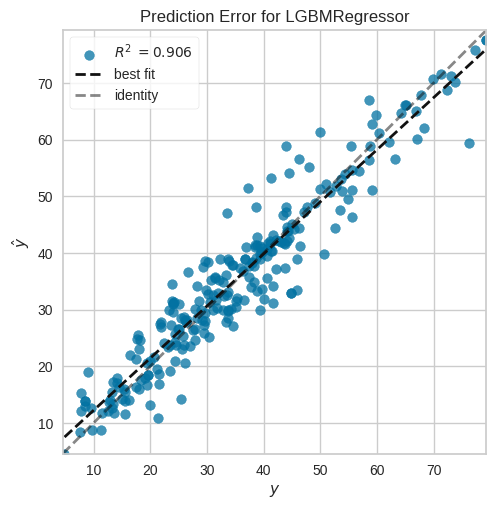

In [ ]:
# Comparar predições e resultados do banco de teste
plot_model(lightgbm, plot='error')

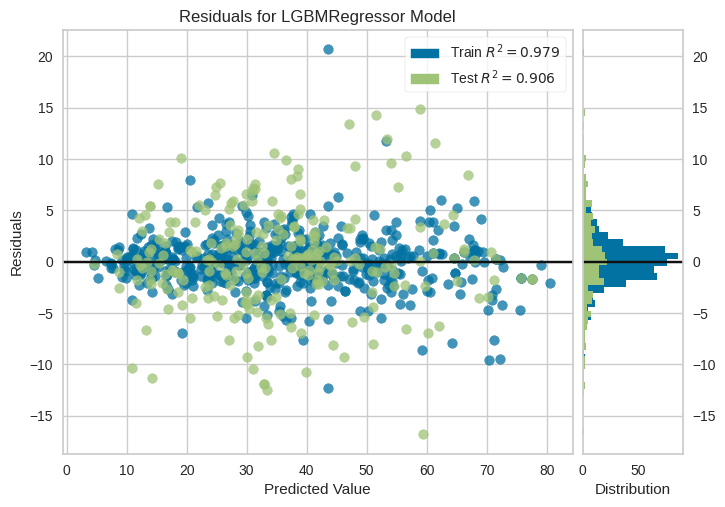

In [ ]:
# Comparar os resíduos
plot_model(lightgbm, plot='residuals')

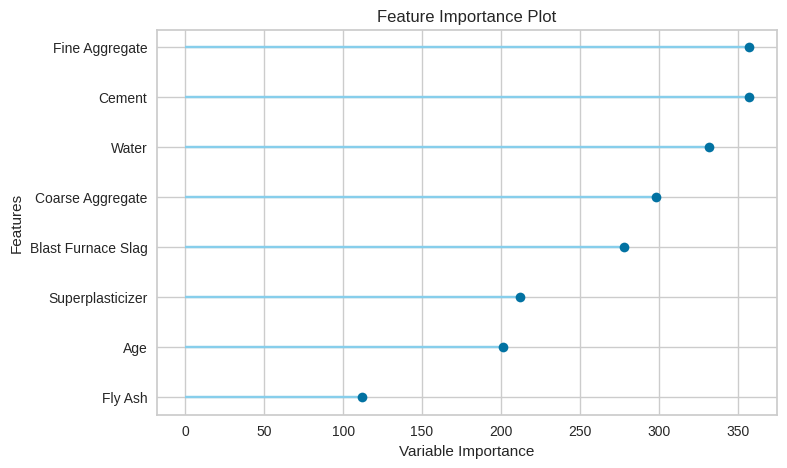

In [ ]:
plot_model(lightgbm, 'feature')

In [ ]:
predict_model(lightgbm, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.7707,28.8448,5.3707,0.8881,0.1499,0.1159


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,prediction_label
31,266.000000,114.000000,0.0,228.000000,0.0,932.000000,670.000000,365,52.910000,50.464816
109,362.600006,189.000000,0.0,164.899994,11.6,944.700012,755.799988,7,55.900002,43.571005
136,389.899994,189.000000,0.0,145.899994,22.0,944.700012,755.799988,28,74.500000,76.074887
88,362.600006,189.000000,0.0,164.899994,11.6,944.700012,755.799988,3,35.299999,33.347159
918,145.000000,0.000000,179.0,202.000000,8.0,824.000000,869.000000,28,10.540000,11.656552
...,...,...,...,...,...,...,...,...,...,...
482,446.000000,24.000000,79.0,162.000000,11.6,967.000000,712.000000,56,56.139999,56.433358
545,255.000000,0.000000,0.0,192.000000,0.0,889.799988,945.000000,28,18.750000,19.670207
110,286.299988,200.899994,0.0,144.699997,11.2,1004.599976,803.700012,7,38.000000,40.283878
514,424.000000,22.000000,132.0,168.000000,8.9,822.000000,750.000000,56,74.360001,66.037675


In [ ]:
lightgbm_final = finalize_model(lightgbm)

In [ ]:
save_model(lightgbm, 'snf_saved_04072020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Cement', 'Blast Furnace Slag',
                                              'Fly Ash', 'Water',
                                              'Superplasticizer',
                                              'Coarse Aggregate',
                                              'Fine Aggregate', 'Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(random_state=5869))]),
 'snf_saved_04072020.pkl')